In [1]:
%matplotlib inline
import imp
import pandas as pd
import geopandas as gpd
from pyproj import Proj
import pyproj
from shapely.ops import transform
import seaborn
import numpy as np
from functools import partial
from shapely.geometry import Point, Polygon, MultiPolygon

In [2]:
from utils import add_forest_areas, dfci_to_wgs

#add_forest_areas('./data/FOR_PUBL_FR_SE.json', './data/FOR_PUBL_FR_SE_A.json')

In [178]:
fires = pd.read_csv('../data/fires_good_DFCI.csv')#./../../../../Downloads/liste_incendies_ du_31_01_2020.csv', sep=';', skiprows=2)

In [131]:
fires.head()

,Year,Id,Type_of_fire,Department,INSEE_code,Town,Locality,DFCI_coordinate,Signal,Origin,Area
0,1973,6389,9,66,66196,Sorède,piste dfci al33 mas berdaguer,GC42F25,1973-01-07 12:41:00,3.0,NaN
1,1973,8,0,06,06060,Falicon,FALICON,R21B03,1973-01-09 13:50:00,3.0,10000.0
2,1973,6102,9,84,84078,Mondragon,NaN,N20H16,1973-01-12 18:35:00,NaN,0.0
3,1973,6106,9,84,84140,Vaugines,NaN,O21C16,1973-01-13 18:30:00,NaN,0.0
4,1973,4789,9,34,34078,Claret,NaN,M21G13,1973-01-21 16:00:00,NaN,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125797828>]],
      dtype=object)

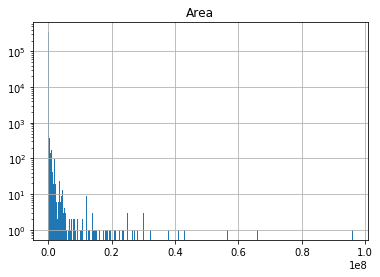

In [160]:
fires[fires['Surface parcourue (m2)']<1e+08].hist('Surface parcourue (m2)', bins = 1000, log=True)

In [67]:
fires.describe()

,Année,Numéro,Type de feu,Origine de l'alerte,Surface parcourue (m2)
count,490401.000000,490401.000000,490401.000000,230880.000000,3.525530e+05
mean,1993.928236,5831.041370,6.906146,3.044287,2.632287e+04
std,13.000699,4048.885052,3.802695,0.826726,5.987885e+05
min,1973.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,1983.000000,2611.000000,9.000000,3.000000,0.000000e+00
50%,1991.000000,5226.000000,9.000000,3.000000,0.000000e+00
75%,2005.000000,8192.000000,9.000000,3.000000,1.000000e+03
max,2020.000000,19751.000000,9.000000,6.000000,1.158000e+08


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


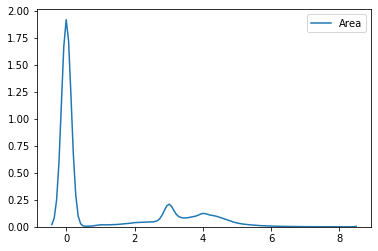

In [161]:
logSurf = np.log10(np.clip(fires['Area'], a_min=1, a_max=None))
seaborn.kdeplot(logSurf)

In [74]:
np.log(5e5)

13.122363377404328

In [83]:
fires['Surface parcourue (m2)'][(fires['Surface parcourue (m2)'].isna()) | (fires['Surface parcourue (m2)'] == 0)].shape[0]/fires.shape[0]

0.7673495771827545

In [85]:
.shape[0]/fires.shape[0]

0.7673495771827545

In [89]:
fires[(fires['Type de feu']==0) & (fires['Surface parcourue (m2)']== 0)].shape

(0, 11)

In [5]:
fire[['lat', 'lon']] = fires['DFCI_coordinate'].apply(dfci_to_wgs)

ValueError: invalid literal for int() with base 10: 'B'

In [177]:
valid_dfci_letters = 'ABCDEFGHKLMN'
#fires['DFCI_coordinate'].apply(lambda x: x if x[0] in valid_dfci_letters else valid_dfci_letters.find(x[0])).sum()

In [24]:
fires['Surface parcourue (m2)'].sum()

30658716

In [188]:
departments = gpd.read_file('../data/contours-geographiques-des-departements-2019.geojson').set_index('insee_dep')

In [189]:
our_departments = fires['Department'].unique()

possible_squares = compute_intersections(departments.reset_index(),carroyage.reset_index(),our_departments,'insee_dep','COORD_100')

In [183]:
%run ./data_collecters/data_preprocessing.py

,Unnamed: 0,Year,Id,Department,INSEE_code,Town,Locality,DFCI_coordinate,Signal,Origin,Area


In [91]:
carroyage['geometry']

COORD_100
AA    POLYGON ((-4.683890624179722 40.27108311164201...
AB    POLYGON ((-4.789769620126292 41.16313991271785...
AC    POLYGON ((-4.898797540425189 42.0563106446552,...
AD    POLYGON ((-5.011203279184085 42.95033181312999...
AE    POLYGON ((-5.127144923221403 43.84499644636202...
                            ...                        
NH    POLYGON ((8.871871892322154 46.61286468184019,...
NK    POLYGON ((8.982109195274971 47.50929196831891,...
NL    POLYGON ((9.096119499366559 48.40529329853517,...
NM    POLYGON ((9.214101710998571 49.30063952086534,...
NN    POLYGON ((9.336266167933237 50.19509903633275,...
Name: geometry, Length: 144, dtype: object

In [167]:
from shapely.geometry import Point, Polygon
carroyage = gpd.read_file('../data/CARRO_DFCI_100x100_L93/CARROYAGE_DFCI_100X100.shp').set_index('COORD_100')

carroyage['geometry'] = transform_shapes_projection(carroyage['geometry'])

In [168]:
carroyage.reset_index().to_file('../data/carroyage_93.json', driver='GeoJSON')

In [56]:
carroyage

,COORD_100,geometry,geometry_wgs
0,AA,"POLYGON ((40.27108 -4.68389, 40.36024 -4.69433...","POLYGON ((40.27108 -4.68389, 40.36024 -4.69433..."
1,AB,"POLYGON ((41.16314 -4.78977, 41.25241 -4.80052...","POLYGON ((41.16314 -4.78977, 41.25241 -4.80052..."
2,AC,"POLYGON ((42.05631 -4.89880, 42.14568 -4.90988...","POLYGON ((42.05631 -4.89880, 42.14568 -4.90988..."
3,AD,"POLYGON ((42.95033 -5.01120, 43.03977 -5.02264...","POLYGON ((42.95033 -5.01120, 43.03977 -5.02264..."
4,AE,"POLYGON ((43.84500 -5.12714, 43.93449 -5.13894...","POLYGON ((43.84500 -5.12714, 43.93449 -5.13894..."
...,...,...,...
139,NH,"POLYGON ((46.61286 8.87187, 46.70252 8.88273, ...","POLYGON ((46.61286 8.87187, 46.70252 8.88273, ..."
140,NK,"POLYGON ((47.50929 8.98211, 47.59892 8.99334, ...","POLYGON ((47.50929 8.98211, 47.59892 8.99334, ..."
141,NL,"POLYGON ((48.40529 9.09612, 48.49486 9.10774, ...","POLYGON ((48.40529 9.09612, 48.49486 9.10774, ..."
142,NM,"POLYGON ((49.30064 9.21410, 49.39013 9.22613, ...","POLYGON ((49.30064 9.21410, 49.39013 9.22613, ..."


In [197]:
clean_coordinates = preprocess_DFCI_coordinates(fires, possible_squares)

Finished for department 66
Finished for department 06
Finished for department 84
Finished for department 34
Finished for department 83
Finished for department 13
Finished for department 11
Finished for department 2A
Finished for department 2B
Finished for department 07
Finished for department 30
Finished for department 05
Finished for department 48
Finished for department 04
Finished for department 26


In [180]:
fires[['DFCI_coordinate','Department', 'Year']][fires['DFCI_coordinate'].apply(lambda x: x[0].upper() not in valid_dfci_letters)]

,DFCI_coordinate,Department,Year
1,R21B03,06,1973
3,O21C16,84,1973
6,O21F02,84,1973
7,P22O27,83,1973
8,P22O17,83,1973
...,...,...,...
125287,P24S20,83,1983
125302,Q23N09,83,1983
125311,Q22E10,83,1983
127653,Q23M07,83,1983


In [157]:
fires[(fires['Year'] < 1983) & (fires['DFCI_coordinate'].apply(len)<7)]

,Unnamed: 0,Year,Id,Department,INSEE_code,Town,Locality,DFCI_coordinate,Signal,Origin,Area


In [198]:
dfci_to_wgs(clean_coordinates.values)

([42.52706900632841,
  44.00073540685504,
  44.100611704581375,
  44.08591153425603,
  43.554169088253744,
  44.11946068359597,
  43.89389180942723,
  43.3934002292581,
  43.4806234436499,
  43.479532250684244,
  44.17422776266,
  43.872791916603546,
  43.92894929374183,
  43.69636680918025,
  43.01829563615463,
  43.63967008503071,
  43.648915111331384,
  43.435760291242154,
  43.5809018015521,
  43.40647114663192,
  44.09471354972472,
  44.295918995971796,
  44.138849793464665,
  44.09594057166164,
  43.57131942492304,
  43.45754299730551,
  43.87869546617198,
  43.90064140121228,
  43.489595604174156,
  44.093234282673144,
  43.57086897113929,
  43.63181935117047,
  43.39456114275468,
  43.74792297226593,
  44.14509956981606,
  43.2839849472003,
  43.82817737490536,
  43.635055139862615,
  43.161437999762065,
  43.880892276203085,
  43.441492330047375,
  43.82822699714959,
  43.94140223841286,
  43.95608866379092,
  43.64332957215751,
  43.678709233277196,
  43.657630418997734,
  42

In [124]:
clean_coordinates

0         GC42F25
1         LD66L73
2         KD48D82
3         KD08G34
4         GD60G11
           ...   
236143    KD80C21
236144    HD68F11
236145    NC80G35
236146    LD64E55
236147    HD86C83
Name: DFCI_coordinate, Length: 236148, dtype: object

In [199]:
fires['DFCI_coordinate'] = clean_coordinates

In [205]:
fires = fires.rename(columns={'Id': 'ID'})

In [207]:
fires.to_csv('../data/fires.csv', index=False)

array(['66', '06', '84', '34', '83', '13', '11', '2A', '2B', '07', '30',
       '05', '48', '04', '26'], dtype=object)